In [ ]:
#introduction. dont delete  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./facebook_ads_data.csv')

### Table information

In [3]:
df.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


In [5]:
df.describe()

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
count,1494.000000,1494.000000,1494.000000,1494.000000,1443.000000,1462.000000,1462.000000,1462.000000
mean,131.035964,34190.182062,318.840696,165.457450,0.814712,5.085677,0.011947,1.326322
std,214.968986,44433.507387,485.663099,274.764573,1.705224,8.107076,0.013192,0.343012
min,0.000000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.751445
25%,18.047500,8377.000000,62.250000,24.350000,0.170000,1.500000,0.004462,1.067832
50%,48.515000,15983.000000,148.000000,65.460000,0.350000,2.775000,0.007845,1.299482
75%,161.790000,45849.750000,371.750000,196.595000,0.765000,5.275000,0.015005,1.527423
max,2035.490000,456481.000000,6199.000000,2562.600000,24.790000,114.150000,0.159223,2.486911


In [6]:
df.isnull().sum()

ad_date               0
campaign_name         0
total_spend           0
total_impressions     0
total_clicks          0
total_value           0
cpc                  51
cpm                  32
ctr                  32
romi                 32
dtype: int64

In [7]:
df = df.fillna(0)

In [8]:
df.isnull().sum()

ad_date              0
campaign_name        0
total_spend          0
total_impressions    0
total_clicks         0
total_value          0
cpc                  0
cpm                  0
ctr                  0
romi                 0
dtype: int64

### Task

In [ ]:
#1. Group data by days, plot total daily ad spend and daily ROMI for 2021. Use rolling() for moving averages.

#2. Group data by campaign name, plot total ad spend and overall ROMI per campaign.

#3. Use box plots to show the distribution of daily ROMI per campaign.

#4. Create a histogram of ROMI values from the dataset.

#5. Generate a heatmap of correlations among all numerical features. Identify highest/lowest correlations and factors correlated with "total_value".

#6. Visualize the relationship between "total_spend" and "total_value" with a scatter plot and linear regression  using lmplot().

### Analysis and graphics

##### 1. Spend and daily ROMI for 2021

In [9]:
#daily total spend

df['year'] = pd.to_datetime(df['ad_date']).dt.year
total_spend = df[df['year']  == 2021].groupby(by='ad_date')['total_spend'].sum().reset_index()
total_spend

,ad_date,total_spend
0,2021-01-01,0.39
1,2021-01-02,7.74
2,2021-01-04,70.06
3,2021-01-05,81.15
4,2021-01-06,142.77
...,...,...
324,2021-12-27,478.31
325,2021-12-28,359.83
326,2021-12-29,163.25
327,2021-12-30,285.67


In [10]:
#daily romi

romi = df[df['year']  == 2021].groupby(by='ad_date').agg({'total_value' : 'sum', 'total_spend' : 'sum'} ).reset_index()
romi['romi'] = round((romi['total_value'] - romi['total_spend']) / romi['total_spend'] * 100, 2)
romi

,ad_date,total_value,total_spend,romi
0,2021-01-01,0.59,0.39,51.28
1,2021-01-02,6.90,7.74,-10.85
2,2021-01-04,68.47,70.06,-2.27
3,2021-01-05,61.68,81.15,-23.99
4,2021-01-06,145.97,142.77,2.24
...,...,...,...,...
324,2021-12-27,686.47,478.31,43.52
325,2021-12-28,450.47,359.83,25.19
326,2021-12-29,171.76,163.25,5.21
327,2021-12-30,330.26,285.67,15.61


In [11]:
# 3 day rolling sum of daily spend

rolling_spend = total_spend['total_spend'].rolling(window=3).sum()
rolling_spend


0          NaN
1          NaN
2        78.19
3       158.95
4       293.98
        ...   
324    1135.82
325    1082.25
326    1001.39
327     808.75
328     622.30
Name: total_spend, Length: 329, dtype: float64

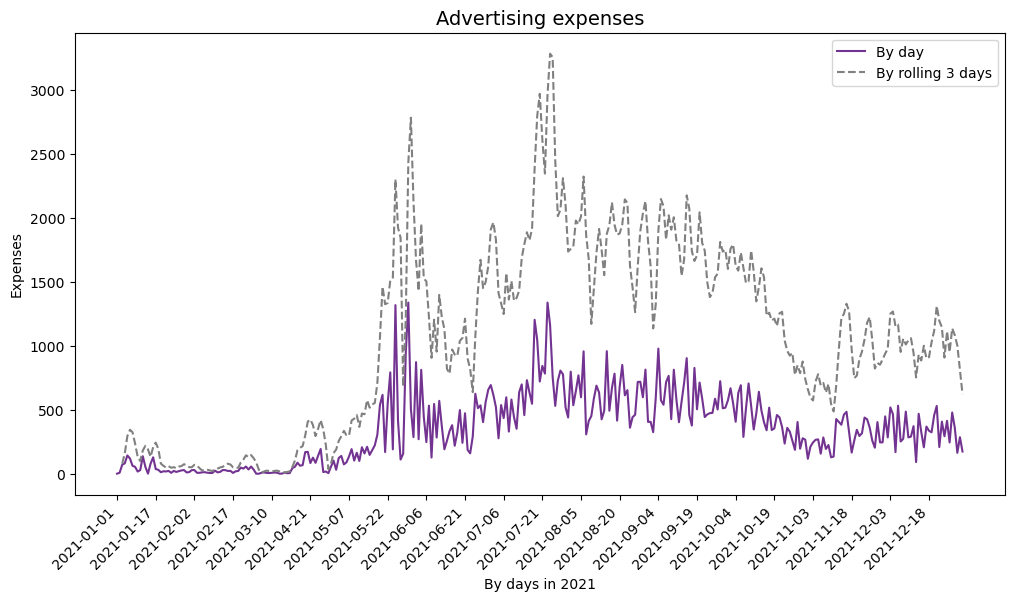

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_spend, x='ad_date', y='total_spend', color="#733391", label = 'By day')
sns.lineplot(data=rolling_spend, color='grey', linestyle='--', label = 'By rolling 3 days')
plt.title('Advertising expenses', fontsize = 14)
plt.xlabel('By days in 2021')
plt.ylabel('Expenses')
plt.xticks(rotation=45, ticks=total_spend['ad_date'][::15], ha='right')
plt.show()

In [13]:
# 3 day rolling sum of daily romi

rolling_romi = romi['romi'].rolling(window=3).sum()
rolling_romi

0         NaN
1         NaN
2       38.16
3      -37.11
4      -24.02
        ...  
324    127.72
325    123.29
326     73.92
327     46.01
328     26.43
Name: romi, Length: 329, dtype: float64

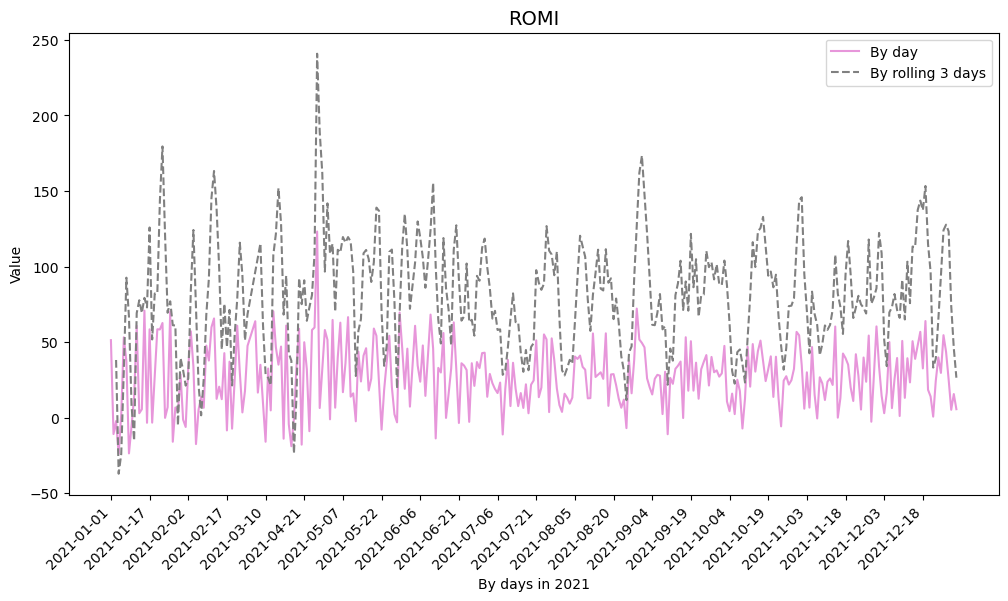

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=romi, x='ad_date', y='romi', color="#E796DA", label = 'By day')
sns.lineplot(data=rolling_romi, color="grey", linestyle='--', label = 'By rolling 3 days')
plt.title('ROMI', fontsize = 14)
plt.xlabel('By days in 2021')
plt.ylabel('Value')
plt.xticks(rotation=45, ticks=total_spend['ad_date'][::15], ha='right')

plt.show()

#### 2.  Total ad spend and overall ROMI per campaign 

In [15]:
#grouping data by campaign

campaigns = df[df['year']  == 2021].groupby(by='campaign_name').agg({'total_value' : 'sum', 'total_spend' : 'sum'} ).reset_index()
campaigns['romi'] =  round((campaigns['total_value'] - campaigns['total_spend']) / campaigns['total_spend'] * 100, 2)
campaigns

,campaign_name,total_value,total_spend,romi
0,Brand,518.67,421.64,23.01
1,Crazy discounts,2583.59,2175.29,18.77
2,Discounts,2196.60,1791.22,22.63
3,Electronics,29169.38,23920.42,21.94
4,Lookalike,80234.70,63631.09,26.09
5,New items,3742.05,2936.97,27.41
6,Promos,8793.77,4993.84,76.09
7,Trendy,2326.05,1234.68,88.39
8,Wholesale,17421.33,14181.71,22.84


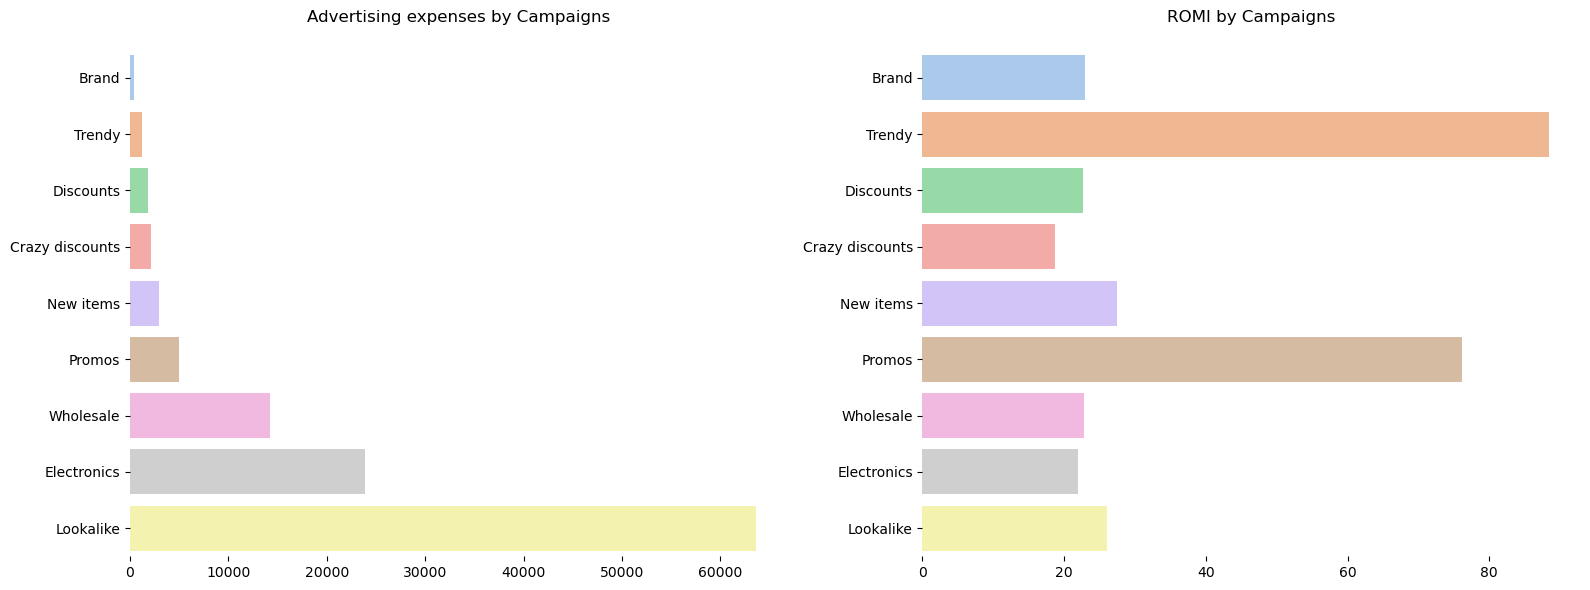

In [16]:
fig, ax  = plt.subplots(ncols=2, figsize=(16, 6))
sns.barplot(data=campaigns.sort_values(by='total_spend'), y='campaign_name', x='total_spend', ax=ax[0], hue='campaign_name', palette='pastel')
sns.barplot(data=campaigns.sort_values(by='total_spend'), y='campaign_name', x='romi', ax=ax[1], hue='campaign_name', palette='pastel')

#styles 
ax[0].set_title('Advertising expenses by Campaigns', pad=20)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
for spine in ax[0].spines.values():
    spine.set_visible(False)

ax[1].set_title('ROMI by Campaigns', pad=20)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
for spine in ax[1].spines.values():
    spine.set_visible(False)

plt.tight_layout() 

In [ ]:
# In these charts  we can see that most of the ROMI values come from the Trendy and Promos campaigns, despite their spending being much lower than, for example, in the Lookalike campaign.

#### 3. Distribution of daily ROMI per campaign

ROMI = (Income - markenting costs) / markenting costs * 100 %

In [17]:
df['romi2'] = round((df['total_value'] - df['total_spend']) / df['total_spend'] * 100, 2)
df['romi2'] = df['romi2'].fillna(0)

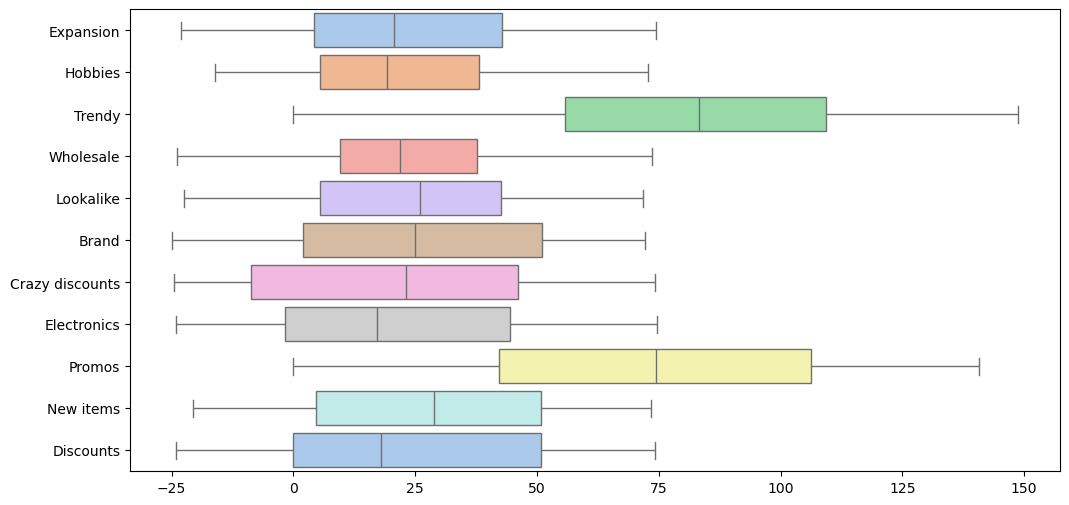

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, y='campaign_name', x='romi2', hue='campaign_name', palette='pastel')

plt.xlabel('')
plt.ylabel('')
plt.show()

#### 4. Histogram of ROMI values

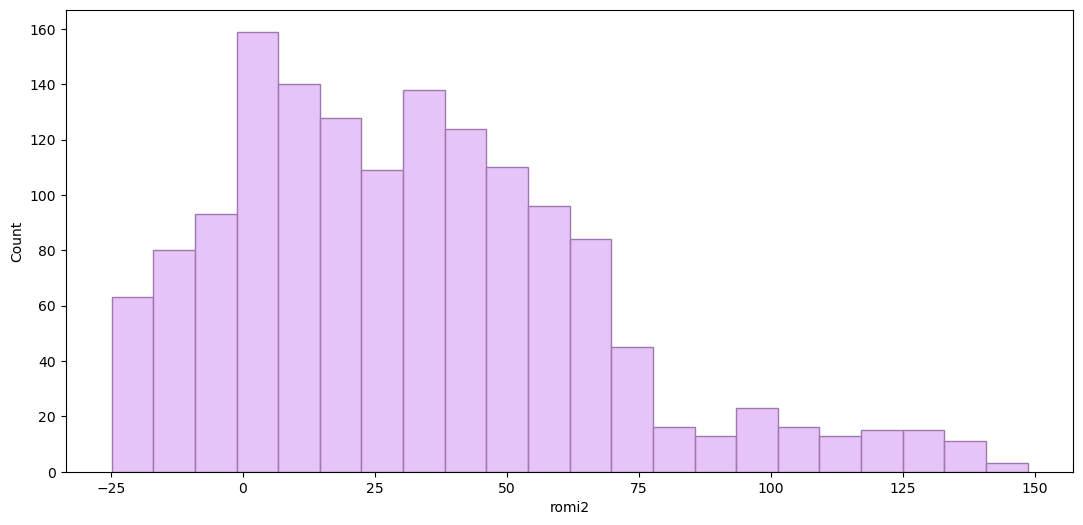

In [19]:
plt.figure(figsize=(13,6))
sns.histplot(data=df['romi2'], color="#DFB0F5", edgecolor="#9E78AF")
plt.show()

In [ ]:
#The histogram shows the distribution of ROMI values  ranging from as low as -25 to nearly 150. Most of the values are concentrated close to zero

#### 5. A heatmap of correlations among all numerical features

In [45]:
df_corr = df.drop(columns=['ad_date','campaign_name', 'year']).corr()
df_corr

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi,romi2
total_spend,1.000000,0.475607,0.480066,0.978890,0.269575,0.486300,-0.013313,-0.055106,-0.100851
total_impressions,0.475607,1.000000,0.765489,0.472037,-0.079259,-0.109387,-0.138378,-0.029942,-0.082214
total_clicks,0.480066,0.765489,1.000000,0.472124,-0.146827,-0.023651,0.210532,-0.040042,-0.086645
total_value,0.978890,0.472037,0.472124,1.000000,0.258207,0.475645,-0.010272,0.032000,-0.001252
cpc,0.269575,-0.079259,-0.146827,0.258207,1.000000,0.595353,-0.192262,-0.033160,-0.067002
cpm,0.486300,-0.109387,-0.023651,0.475645,0.595353,1.000000,0.126742,-0.009260,-0.049201
ctr,-0.013313,-0.138378,0.210532,-0.010272,-0.192262,0.126742,1.000000,0.021625,-0.030955
romi,-0.055106,-0.029942,-0.040042,0.032000,-0.033160,-0.009260,0.021625,1.000000,0.929874
romi2,-0.100851,-0.082214,-0.086645,-0.001252,-0.067002,-0.049201,-0.030955,0.929874,1.000000


In [46]:
df_corr[df_corr['total_value'] >= 0.3]

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi,romi2
total_spend,1.000000,0.475607,0.480066,0.978890,0.269575,0.486300,-0.013313,-0.055106,-0.100851
total_impressions,0.475607,1.000000,0.765489,0.472037,-0.079259,-0.109387,-0.138378,-0.029942,-0.082214
total_clicks,0.480066,0.765489,1.000000,0.472124,-0.146827,-0.023651,0.210532,-0.040042,-0.086645
total_value,0.978890,0.472037,0.472124,1.000000,0.258207,0.475645,-0.010272,0.032000,-0.001252
cpm,0.486300,-0.109387,-0.023651,0.475645,0.595353,1.000000,0.126742,-0.009260,-0.049201


In [49]:
df_corr[df_corr['total_value'] <= 0]

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi,romi2
ctr,-0.013313,-0.138378,0.210532,-0.010272,-0.192262,0.126742,1.000000,0.021625,-0.030955
romi2,-0.100851,-0.082214,-0.086645,-0.001252,-0.067002,-0.049201,-0.030955,0.929874,1.000000


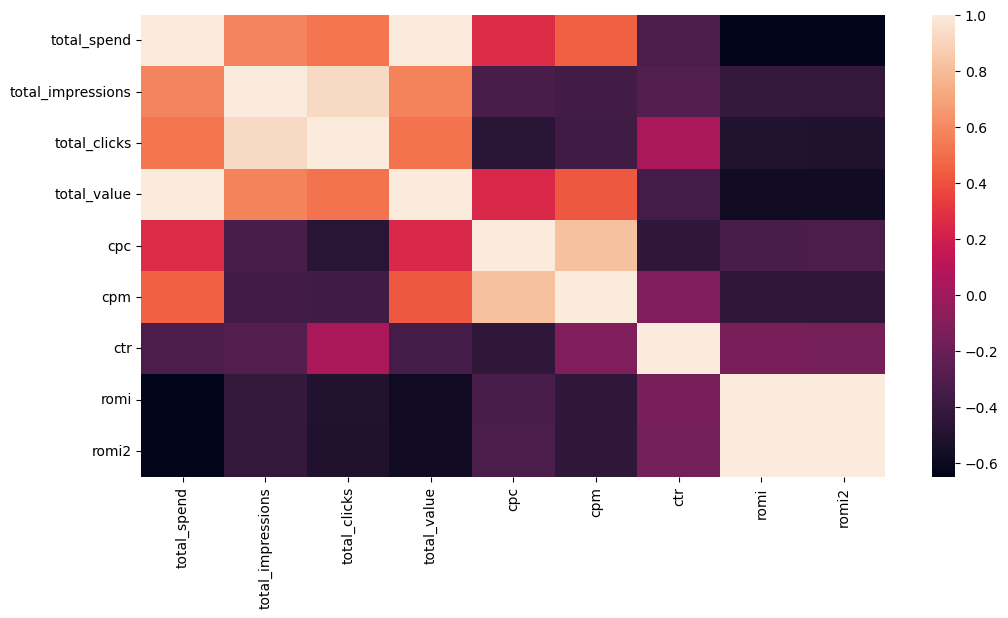

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(df_corr.corr())
plt.show()

<!-- 
    1) The strongest connection is between total_spend and total_value (about 0.98). This means that the more money was spent on ads, the more money the companies made
    2) The second strong positive connection is between total_impressions and total_clicks (0.77). This means that when there are more ad views, there are also more clicks
    3) There is a small negative connection between CTR and CPC (-0.19).
 -->

#### 6. Relationship between ad costs and income

<Figure size 1200x600 with 0 Axes>

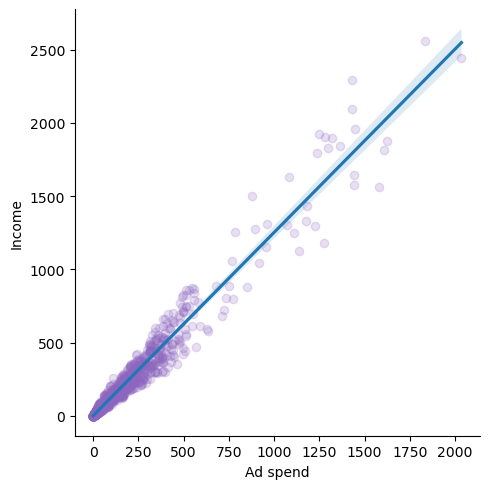

In [31]:
plt.figure(figsize=(12,6))
sns.lmplot(data=df, scatter_kws={'color':"#8D66C0", 'alpha': 0.2},   x='total_spend', y='total_value')
plt.xlabel('Ad spend')
plt.ylabel('Income')
plt.show()

### Summary

So, we looked at the companies’ advertising costs and their income. We compared them by days and campaigns. We found some factors that might affect the results and saw that there is a clear linear connection between total_spend and total_value.

In [14]:
from IPython.display import display, HTML

display(HTML('''
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css">
<style>
  .container {
    display: flex;
    justify-content: center;
    padding: 30px 10px;
  }

  .card {
    width: 100%;
    max-width: 1200px;
    padding: 40px 30px;
    border-radius: 20px;
    position: relative;
    background: linear-gradient(135deg, #ff9a9e, #a18cd1);
    color: white;
    font-family: 'Segoe UI', sans-serif;
    box-shadow: 0 4px 16px rgba(0,0,0,0.2);
    text-align: center;
    overflow: hidden;
  }

  .card::before {
    content: "";
    position: absolute;
    top: 50%;
    left: -20%;
    width: 140%;
    height: 100px;
    background: rgba(255, 255, 255, 0.1);
    transform: rotate(-5deg);
    z-index: 0;
  }

  .card h2 {
    margin: 0;
    font-size: 28px;
    position: relative;
    z-index: 1;
  }

  .subtitle {
    font-size: 20px;
    margin-top: 8px;
    font-weight: 300;
    position: relative;
    z-index: 1;
  }

  .links-row {
    display: flex;
    justify-content: space-around;
    margin-top: 35px;
    flex-wrap: wrap;
    position: relative;
    z-index: 1;
  }

  .link-col {
    flex: 1 1 30%;
    min-width: 150px;
    text-align: center;
  }

  .link {
    display: inline-flex;
    align-items: center;
    justify-content: center;
    text-decoration: none;
    color: white;
    font-size: 18px;
    gap: 10px;
    transition: transform 0.3s ease, box-shadow 0.3s ease;
    padding: 10px 15px;
    border-radius: 10px;
  }

  .link:hover {
    transform: scale(1.05);
    box-shadow: 0 0 10px rgba(255,255,255,0.3);
    text-decoration: none;
    color: #fff;
    background: rgba(255, 255, 255, 0.1);
  }

  .link i {
    font-size: 20px;
  }
</style>

<div class="container">
  <div class="card">
    <h2>Giuler Gashimova</h2>
    <div class="subtitle">Data Analyst</div>

    <div class="links-row">
      <div class="link-col">
        <a class="link" href="https://www.linkedin.com/in/giulerg" target="_blank">
          <i class="fab fa-linkedin"></i>LinkedIn
        </a>
      </div>
      <div class="link-col">
        <a class="link" href="https://github.com/giulerg" target="_blank">
          <i class="fab fa-github"></i>GitHub
        </a>
      </div>
      <div class="link-col">
        <a class="link" href="mailto:henrytheanxious@gmail.com">
          <i class="fas fa-envelope"></i>Email
        </a>
      </div>
    </div>
  </div>
</div>
'''))
